In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 4 Basic Visualizations

Load in each data file:

In [2]:
data = np.loadtxt('data/data.txt', skiprows=0, delimiter='\t', dtype='int')
test = np.loadtxt('data/test.txt', skiprows=0, delimiter='\t', dtype='int')
train = np.loadtxt('data/train.txt', skiprows=0, delimiter='\t', dtype='int')
movies = np.loadtxt('data/movies.txt', skiprows=0, delimiter='\t', dtype='str')

### 1

Create a histogram of all the ratings in the dataset. First, put all the ratings into a list and then plot. 

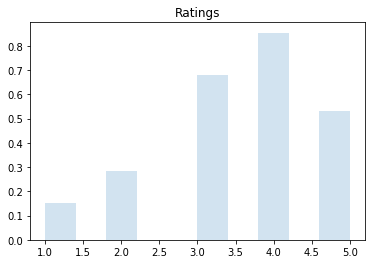

In [3]:
ratings = []
for element in data:
    ratings.append(int(element[2]))

plt.hist(ratings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings')
plt.show()

### 2

First, we will determine the 10 most popular movies. To do this, we will go through the data dataset and determine the number of ratings that each movie has received

In [4]:
totalRatings = {}
for element in data:
    if element[1] in totalRatings:
        totalRatings[element[1]] += 1
    else:
        totalRatings[element[1]] = 1

Now, convert the dictionary to a list and sort by the number of ratings:

In [5]:
ratingList = []

for item in totalRatings.items():
    ratingList.append(item)
    
ratingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 most popular movies:

In [6]:
ratingList[:10]

[(50, 583),
 (258, 509),
 (100, 508),
 (181, 507),
 (294, 485),
 (286, 481),
 (288, 478),
 (1, 452),
 (300, 431),
 (121, 429)]

Create a dictionary for the ten most popular movies, find all the ratings, and plot as a histogram:

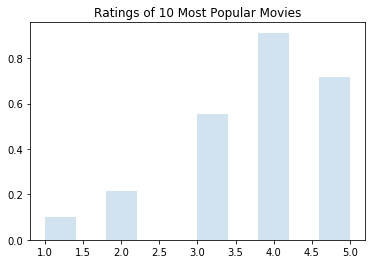

In [7]:
popular = {}
for item in ratingList[:10]:
    popular[item[0]] = True
    
popularRatings = []
for element in data:
    if element[1] in popular:
        popularRatings.append(int(element[2]))

plt.hist(popularRatings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Most Popular Movies')
plt.show()

### 3

Find the average ratings of each movie and sort a list by the best rated:

In [8]:
avgRatings = {}
for element in data:
    if element[1] in avgRatings:
        avgRatings[element[1]][0] += int(element[2])
        avgRatings[element[1]][1] += 1
    else:
        avgRatings[element[1]] = [int(element[2]), 1]

        
avgRatingList = []

for key, value in avgRatings.items():
    avgRatingList.append((key, value[0] / float(value[1])))
    
avgRatingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 best rated movies:

In [9]:
avgRatingList[:10]

[(1189, 5.0),
 (1500, 5.0),
 (814, 5.0),
 (1536, 5.0),
 (1293, 5.0),
 (1599, 5.0),
 (1653, 5.0),
 (1467, 5.0),
 (1122, 5.0),
 (1201, 5.0)]

Create a dictionary for the ten best rated movies, find all the ratings, and plot as a histogram:

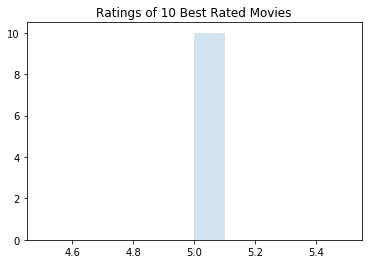

In [10]:
best = {}
for item in avgRatingList[:10]:
    best[item[0]] = True
    
bestRatings = []
for element in data:
    if element[1] in best:
        bestRatings.append(int(element[2]))

plt.hist(bestRatings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Best Rated Movies')
plt.show()

### 4

We choose to do the genres Comedy, Western, and Romance.

In [11]:
print(movies[0])

['1' 'Toy Story (1995)' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0']


In [12]:
print(movies)

[['1' 'Toy Story (1995)' '0' ..., '0' '0' '0']
 ['2' 'GoldenEye (1995)' '0' ..., '1' '0' '0']
 ['3' 'Four Rooms (1995)' '0' ..., '1' '0' '0']
 ..., 
 ['1680' 'Sliding Doors (1998)' '0' ..., '0' '0' '0']
 ['1681' 'You So Crazy (1994)' '0' ..., '0' '0' '0']
 ['1682' 'Scream of Stone (Schrei aus Stein) (1991)' '0' ..., '0' '0' '0']]


Find all the movies that are comedy, western, and/or animation:

In [13]:
genres = {'Comedy':[], 'Western':[], 'Animation':[]}
for movie in movies:
    if movie[7] == '1':
        genres['Comedy'].append(int(movie[0]))
    if movie[20] == '1':
        genres['Western'].append(int(movie[0]))
    if movie[16] == '1':
        genres['Animation'].append(int(movie[0]))

For the movies in each category, find all the ratings and plot a histogram:

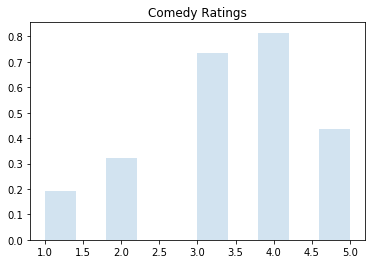

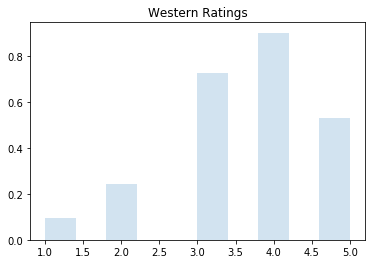

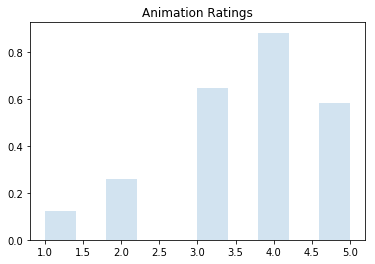

In [14]:
for genre in genres.keys():
    genre_ratings = []
    temp = genres[genre]
    for element in data:
        if element[1] in temp:
            genre_ratings.append(int(element[2]))
    title = genre + ' Ratings'
    plt.hist(genre_ratings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
    plt.title(title)
    plt.show()

### 5 Matrix Factorization Visualizations

### Part 1

Below is my code from Homework 5:

In [ ]:
import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - np.dot(Vj, (Yij - np.dot(Ui, Vj))))
       
def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - np.dot(Ui, (Yij - np.dot(Ui, Vj))))

def get_err(U, V, Y, reg=0.1):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    
    # Sum of the squared loss
    summation = 0
    for element in Y:
        i = element[0]
        j = element[1]
        Y_ij = element[2]
        summation += ((Y_ij - np.dot(U[i - 1], V[j - 1])) ** 2)
    
    # Norm squared U 
    fro_U = 0
    for x in range(len(U)):
        for y in range(len(U[0])):
            fro_U += (U[x][y] ** 2)

    # Norm squared V 
    fro_V = 0
    for x in range(len(V)):
        for y in range(len(V[0])):
            fro_V += (V[x][y] ** 2)
    
    # Divide by the length of Y since its mean squared error
    return ((reg / 2) * (fro_U + fro_V) + 0.5 * summation) / len(Y)

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    
    U = []
    V = []
    
    # Initialize the U and V matrixes
    for i in range(M):
        temp = []
        for j in range(K):
            temp.append(np.random.uniform(-0.5, 0.5))
        U.append(temp)
        
    for i in range(N):
        temp = []
        for j in range(K):
            temp.append(np.random.uniform(-0.5, 0.5))
        V.append(temp)   
    U = np.array(U)
    V = np.array(V)
    
    # Now, run the algorithm
    loss_reduct_0 = 0
    loss_prev = get_err_without_bias(U, V, Y)
    for i in range(max_epochs):
        
        # Shuffle order of datapoints
        indices = np.random.permutation(len(Y))
        for index in indices:
            
            # Update U using the ith row of U. The data is 1 indexed so we must change this to 
            # 0 indexed
            U[Y[index][0] - 1] = U[Y[index][0] - 1] - grad_U(U[Y[index][0] - 1], Y[index][2], V[Y[index][1] - 1], reg, eta)
            
            # Update V using the jth column of V
            V[Y[index][1] - 1] = V[Y[index][1] - 1] - grad_V(V[Y[index][1] - 1], Y[index][2], U[Y[index][0] - 1], reg, eta)

        if i == 0:
            loss_reduct_0 = loss_prev - get_err_without_bias(U, V, Y)
        
        if (loss_prev - get_err(U, V, Y)) / loss_reduct_0 <= eps:
            break
            
        loss_prev = get_err_without_bias(U, V, Y)
        print(i)
    
    # Calculate mean unregularized error
    summation = 0
    for element in Y:
        i = element[0]
        j = element[1]
        Y_ij = element[2]
        summation += ((Y_ij - np.dot(U[i - 1], V[j - 1])) ** 2)
        
    return (U, V, summation / (2 * len(Y)))

We will use a regularization parameter of $\lambda=0.1$ since this performed best on the test set in the homework. Our stop criteria will be 300 epochs since this is probably enough epochs to converge if the model is able to converge to a particular value, and our other stop condition will be if the change over an epoch is very small relative to the change over the first epoch, which indicates that the model has basically converged.

1 Train data using Matrix Factorization code from Assignment 5.

In [168]:
import random
import numpy as np

def grad_U_without_bias(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    #summation = Vj * (Yij - (np.dot(Ui, Vj)))

    summation = Vj * (Yij - (np.dot(Ui, Vj)))
    #answer = (reg * Ui) - summation
    answer = (reg * Ui) - summation
    #print(answer)
    return answer * eta

def grad_V_without_bias(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    #summation = Ui * (Yij - (np.dot(Ui, Vj)))

    summation = Ui * (Yij - (np.dot(Ui, Vj)))
    #answer = (reg * Vj) - summation
    answer = (reg * Vj) - summation
    #print(answer)
    return answer * eta

def get_err_without_bias(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    error = 0
    for n in range(0, len(Y)):
        i = Y[n][0] - 1
        j = Y[n][1] - 1
        Yij = Y[n][2]
        Ui = U[i]
        Vj = V[j]
        est = np.dot(Ui, Vj)
        error += ((Yij - est)**2)

    error /= 2
    regularized = error + ((reg/2)*(np.linalg.norm(U)**2 + np.linalg.norm(V)**2))
    print(regularized/len(Y))
    return regularized/len(Y)


def train_model_without_bias(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """

    
    # Create U and V arrays
    U = (np.random.uniform(-0.5, 0.5, (M, K)))

    V = (np.random.uniform(-0.5, 0.5, (N, K)))
    

    indices = list(range(0, len(Y)))
    init_error = get_err_without_bias(U, V, Y, reg)
    
    for epoch in range(0, max_epochs):
        print("epoch = ", epoch)
        
        # Shuffle the points, so that in random order, 
        # iterate through all points and update
        # the weight vector. 

        indices = np.random.permutation(indices)

        for m in range(0, len(indices)):
            i = Y[indices[m]][0] - 1
            j = Y[indices[m]][1] - 1
            Yij = Y[indices[m]][2]
        
        #calculate the gradient and update model parameters
            gradU = grad_U_without_bias(U[i], Yij, V[j], reg, eta)
            gradV = grad_V_without_bias(V[j], Yij, U[i], reg, eta)
            U[i] = U[i] - gradU
            V[j] = V[j] - gradV
        
        new_error = get_err_without_bias(U, V, Y, reg)

        if epoch == 0:
            first_reduction = init_error - new_error;
            old_error = new_error

        else:
            if np.abs((old_error - new_error)/first_reduction) <= eps:
                break
            else:
                old_error = new_error

    return U, V, new_error

In [170]:
U, V, new_error = train_model_without_bias(943, 1682, 10, 0.1, 0, train, 0.0001, 300)

6.89669229598
epoch =  0
0.632532150491
epoch =  1
0.57506428805
epoch =  2
0.57641693411
epoch =  3
0.545028810938
epoch =  4
0.535890318607
epoch =  5
0.564251372469
epoch =  6
0.529626531541
epoch =  7
0.543106148318
epoch =  8
0.520120309693
epoch =  9
0.50489651794
epoch =  10
0.528098072019
epoch =  11
0.526082308481
epoch =  12
0.50823585515
epoch =  13
0.525053169951
epoch =  14
0.523201276588
epoch =  15
0.520636633572
epoch =  16
0.509869407478
epoch =  17
0.525975802696
epoch =  18
0.503565722233
epoch =  19
0.510756348591
epoch =  20
0.521680495355
epoch =  21
0.51621580912
epoch =  22
0.524757885774
epoch =  23
0.494922650069
epoch =  24
0.511103075602
epoch =  25
0.507796902419
epoch =  26
0.541321226228
epoch =  27
0.513783412192
epoch =  28
0.524781527058
epoch =  29
0.522638916155
epoch =  30
0.512927576646
epoch =  31
0.500040813054
epoch =  32
0.50385886399
epoch =  33
0.51898505155
epoch =  34
0.514344112517
epoch =  35
0.511578497574
epoch =  36
0.507988732499
epoc

In [176]:
print(U.shape)

(943, 10)


2 Train with matrix factorization with bias.

Attempt3

3 Using an Off-the-Shelf Implementation from SkLearn, train using the sklearn implementation of matrix factorization.

In [376]:
import sklearn 
from sklearn.decomposition import NMF

In [377]:
k = 20
model = NMF(n_components = k)
W = model.fit_transform(training_matrix)
H = model.components_

In [378]:
# Print U
print(W)
print(W.shape)

[[ 0.56748619  0.          0.         ...,  0.31327909  0.          0.        ]
 [ 0.          0.16681713  0.         ...,  0.16854541  0.          0.06491939]
 [ 0.02268302  0.          0.         ...,  0.0662056   0.          0.        ]
 ..., 
 [ 0.          0.08982744  0.         ...,  0.35158032  0.          0.        ]
 [ 0.31296633  0.00360943  0.         ...,  0.          0.23287615
   0.04389609]
 [ 0.38146196  0.03767428  0.         ...,  0.13078245  0.02114925  0.        ]]
(943, 20)


In [379]:
# Print V
print(H)
print(H.shape)

[[ 0.39624665  0.          0.11621941 ...,  0.          0.03580806
   0.00871677]
 [ 2.15687899  0.          0.00522055 ...,  0.          0.          0.        ]
 [ 0.          0.          0.11131858 ...,  0.          0.          0.02109955]
 ..., 
 [ 1.02134438  0.          1.13342066 ...,  0.          0.          0.        ]
 [ 0.17706643  0.          0.         ...,  0.          0.          0.        ]
 [ 0.48779247  0.23702976  0.         ...,  0.          0.00361328  0.        ]]
(20, 1682)


In [380]:
fitted = model.inverse_transform(model.transform(training_matrix))
count = 0
for user, movie, rating in train:
    
    if(training_matrix[user-1][movie-1]!= int(fitted[user-1][movie-1])):
        count += 1
    #print(rating)
    
# print("count = ", count)
# print("error = ", count/len(train))

In [381]:
print(fitted)
print()

[[  4.18482904e+00   1.78563963e+00   1.27301419e+00 ...,   0.00000000e+00
    3.06385538e-02   3.11417607e-02]
 [  1.92244669e+00   2.73508771e-02   1.92525630e-01 ...,   1.34816636e-02
    1.15665340e-03   0.00000000e+00]
 [  2.43926184e-01   5.83090804e-03   8.07209823e-02 ...,   2.16433543e-02
    1.00041686e-03   1.64157370e-03]
 ..., 
 [  1.95791894e+00   7.83789779e-02   3.98663459e-01 ...,   2.23691105e-04
    1.35583392e-03   6.83913958e-04]
 [  1.19756146e+00   4.53961274e-02   3.62345073e-02 ...,   1.42984193e-02
    1.20966989e-02   2.71620961e-03]
 [  8.01047313e-01   1.91522342e+00   9.59551501e-01 ...,   0.00000000e+00
    2.68512287e-02   1.03104349e-02]]



1 Apply SVD

In [382]:
#U, V, error = train_model_without_bias(943, 1682, 10, 0.1, 0, train, 0.0001, 300)
U = W
V = H
u1, s1, v1 = np.linalg.svd(U, full_matrices = False)
u2, s2, v2 = np.linalg.svd(V, full_matrices = False)
print(u2.shape)
print(v2.shape)

(20, 20)
(20, 1682)


In [394]:
import nimfa

pmf = nimfa.Bmf(training_matrix, seed="random_vcol", rank=20, max_iter=12, rel_error=1e-5)
pmf_fit = pmf()

In [395]:
print(pmf_fit.basis().shape)
print(pmf_fit.coef().shape)

U = pmf_fit.basis()
V = pmf_fit.coef()

u1, s1, v1 = np.linalg.svd(U, full_matrices = False)
u2, s2, v2 = np.linalg.svd(V, full_matrices = False)
print(u2.shape)
print(v2.shape)

(943, 20)
(20, 1682)
(20, 20)
(20, 1682)


In [396]:
two_columns_U = np.array(u1[:, :2])
print(two_columns_U)

two_columns_V = np.array(u2[:, :2])
print(two_columns_V)

[[-0.06685239  0.01545197]
 [-0.01758371 -0.07193813]
 [-0.00822628 -0.04351909]
 ..., 
 [-0.00968521 -0.03332106]
 [-0.02486861  0.00014854]
 [-0.0413601   0.02030304]]
[[-0.22178597 -0.03996658]
 [-0.22051896 -0.00282018]
 [-0.20881181  0.17373239]
 [-0.22392743  0.12140782]
 [-0.2421878  -0.02989605]
 [-0.20709795  0.01696444]
 [-0.21298381  0.04576759]
 [-0.2207531  -0.07002041]
 [-0.25385847  0.28726588]
 [-0.22212979  0.01011657]
 [-0.23035027  0.0687046 ]
 [-0.23747376  0.15207662]
 [-0.21180208  0.17139963]
 [-0.22807335  0.12088898]
 [-0.21097338 -0.11947226]
 [-0.2138101   0.15316914]
 [-0.22493279 -0.46422413]
 [-0.22095902 -0.72717285]
 [-0.22098109  0.00077088]
 [-0.23281922  0.0938605 ]]


In [397]:
U_tilda = np.dot(two_columns_U.transpose(), U)
V_tilda = np.dot(two_columns_V.transpose(), V)

U_tilda = np.array(U_tilda)
V_tilda = np.array(V_tilda)

print(V_tilda[0][49])

-0.560132373557


In [398]:
print(U_tilda.shape)
print(V_tilda.shape)
print(U_tilda[0][0])

(2, 20)
(2, 1682)
-30.3480890012


In [353]:
training_matrix = np.zeros((943, 1682))

    
print("done 1")

for user, movie, rating in train:
    training_matrix[user-1][movie-1] = rating
    #print(rating)
    
print("done 2")

done 1
done 2


In [354]:
print(training_matrix.shape)

(943, 1682)


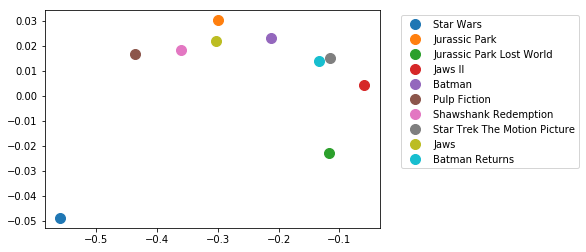

In [399]:
plt.plot([V_tilda[0][49]], [V_tilda[1][49]], 'o', markersize=10, label='Star Wars')
plt.plot([V_tilda[0][81]], [V_tilda[1][81]], 'o', markersize=10, label='Jurassic Park')
plt.plot([V_tilda[0][251]], [V_tilda[1][251]], 'o', markersize=10, \
         label='Jurassic Park Lost World')
plt.plot([V_tilda[0][451]], [V_tilda[1][451]], 'o', markersize=10, label='Jaws II')
plt.plot([V_tilda[0][402]], [V_tilda[1][402]], 'o', markersize=10, \
         label='Batman')
plt.plot([V_tilda[0][55]], [V_tilda[1][55]], 'o', markersize=10, label='Pulp Fiction')
plt.plot([V_tilda[0][63]], [V_tilda[1][63]], 'o', markersize=10, \
         label='Shawshank Redemption')
plt.plot([V_tilda[0][448]], [V_tilda[1][448]], 'o', markersize=10, label='Star Trek \
The Motion Picture')
plt.plot([V_tilda[0][233]], [V_tilda[1][233]], 'o', markersize=10, label='Jaws')
plt.plot([V_tilda[0][230]], [V_tilda[1][230]], 'o', markersize=10, label='Batman Returns')

plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

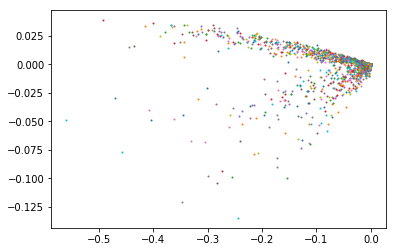

In [400]:
for element in movies:
    index = int(element[0])
    label = movies[index - 1][1]
    plt.plot(V_tilda[0][index - 1], V_tilda[1][index - 1], 'o', markersize = 1, label = label)
    
plt.show()
    